In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Importing Data

In [2]:
file_path = "CarPrice.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
88,89,-1,mitsubishi mirage g4,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279.0
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
186,187,2,volkswagen 411 (sw),gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495.0
183,184,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,7975.0
109,110,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0
41,42,0,honda civic,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
107,108,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900.0
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0


### Column Descriptions

In [5]:
## Data Columns

# 1. car_ID: Unique identifier for each car.
# 2. symboling: Risk rating assigned to the car (integer value ranging from -3 to +3, +3:risky, -3:safe).
# 3. CarName: Name of the car, including the brand and model.
# 4. fueltype: Type of fuel used by the car (e.g., gas, diesel).
# 5. aspiration: Type of aspiration used in the engine (e.g., standard, turbo).
# 6. doornumber: Number of doors on the car (e.g., two, four).
# 7. carbody: Type of car body (e.g., sedan, hatchback, wagon).
# 8. drivewheel: Type of drivetrain (e.g., front-wheel drive, rear-wheel drive, four-wheel drive).
# 9. enginelocation: Location of the engine in the car (e.g., front, rear).
# 10. wheelbase: Distance between the front and rear axles (measured in inches).
# 11. carlength: Length of the car (measured in inches).
# 12. carwidth: Width of the car (measured in inches).
# 13. carheight: Height of the car (measured in inches).
# 14. curbweight: Weight of the car without passengers or cargo.
# 15. enginetype: Type of engine (e.g., DOHC, OHV, rotor).
# 16. cylindernumber: Number of cylinders in the engine (e.g., four, six, eight).
# 17. enginesize: Size of the engine, measured in cubic inches or cubic centimeters.
# 18. fuelsystem: Type of fuel system used (e.g., MPFI, 2BBL, SPFI).
# 19. boreratio: Ratio of the cylinder bore diameter to the piston stroke.
# 20. stroke: Length of the piston stroke within the engine.
# 21. compressionratio: Ratio of the engine’s cylinder volume when the piston is at the bottom of the stroke to when it's at the top.
# 22. horsepower: Maximum power output of the engine.
# 23. peakrpm: Engine's RPM (revolutions per minute) at which peak horsepower is produced.
# 24. citympg: Fuel efficiency of the car in city driving conditions (miles per gallon).
# 25. highwaympg: Fuel efficiency of the car in highway driving conditions (miles per gallon).



## Exploratory Data Analysis(EDA)

In [6]:
df.shape

(205, 26)

In [7]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### Missing Values

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Numeric Features & Price

In [11]:
numeric_df = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 
                 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
numeric_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


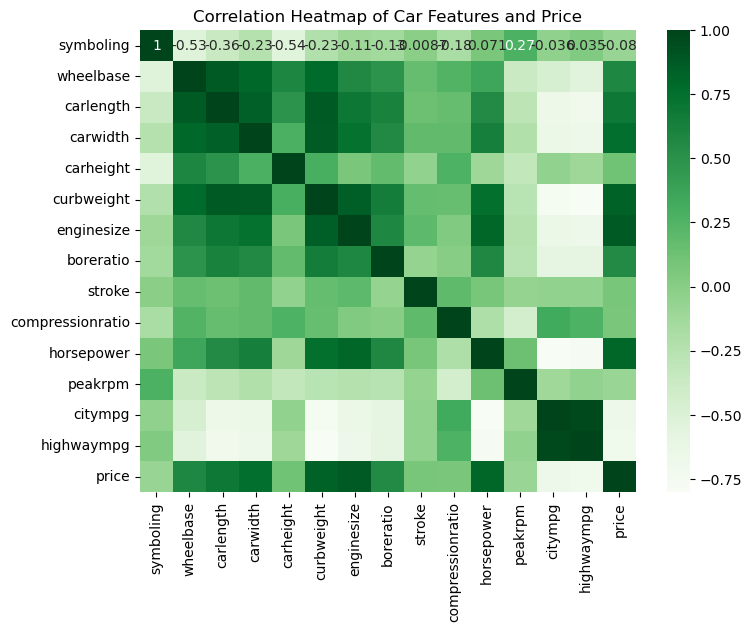

In [12]:
# Correlation Heatmap: All Numeric Features and Price

corr = numeric_df.corr()
print(corr['price'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Car Features and Price')
#plt.figure(figsize=(20,15))
plt.show()

# high correlated features: enginesize, curbweight, horsepower, carwidth, carlength, wheelbase, boreratio
# lower: stroke, compressionratio
# negatively correlated: highwaympg, citympg, peakrpm
#

In [13]:
# correlation matrix: 4 least correlated features 
print(df[['peakrpm','symboling', 'stroke', 'compressionratio', 'price' ]].corr())

                   peakrpm  symboling    stroke  compressionratio     price
peakrpm           1.000000   0.273606 -0.067964         -0.435741 -0.085267
symboling         0.273606   1.000000 -0.008735         -0.178515 -0.079978
stroke           -0.067964  -0.008735  1.000000          0.186110  0.079443
compressionratio -0.435741  -0.178515  0.186110          1.000000  0.067984
price            -0.085267  -0.079978  0.079443          0.067984  1.000000


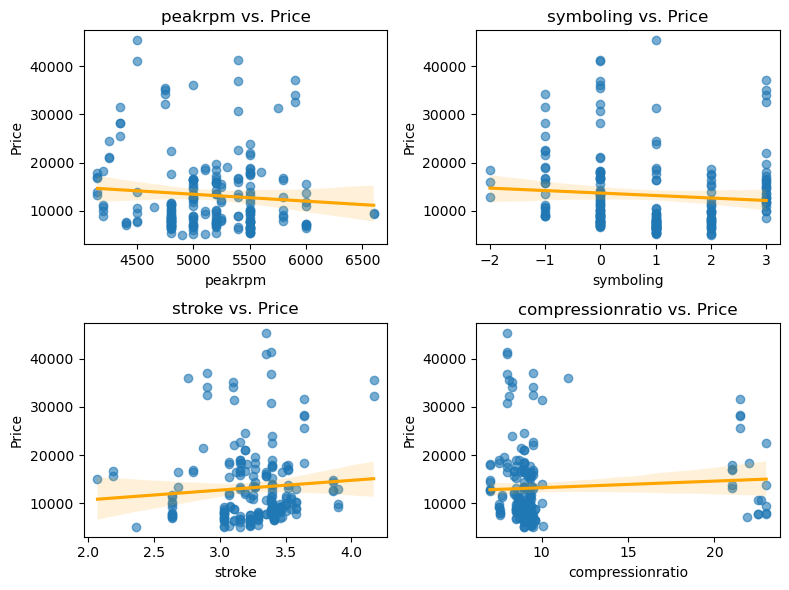

In [14]:
# Compare feature correlations with price that are < 0.1 or > -0.1

features = ['peakrpm','symboling', 'stroke', 'compressionratio']
plt.figure(figsize=(8, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=df[feature], y=df['price'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'}) # alpha controls dot transparency
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs. Price')

plt.tight_layout()
plt.show()


#### EDA: Symboling(discrete) & Price

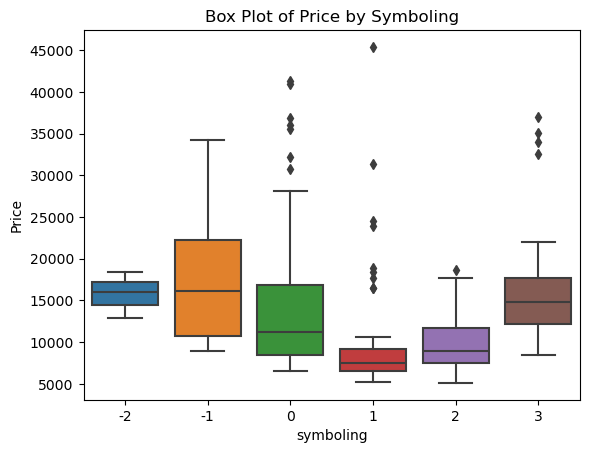

In [15]:
# Explore distribution of price in quantiles by symboling

sns.boxplot(x='symboling', y='price', data=df)
plt.xlabel('symboling')
plt.ylabel('Price')
plt.title('Box Plot of Price by Symboling')
plt.show()

# Result shows ratings(median) between -2 and 0 is positively correlated with price
# While ratings(median) from 1 to 3 is reversely correlated with price


## Feature Importance (all features)

In [16]:
featImp_df = df.copy()

In [17]:
# Encode categorical features before merge them with numeric features

categorical_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 
                        'enginetype', 'cylindernumber', 'fuelsystem']

ordinal_encoder = OrdinalEncoder()  # use ordinal encoder to convert categorical data to integer values
featImp_df[categorical_features] = ordinal_encoder.fit_transform(featImp_df[categorical_features])


In [18]:
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
                    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
                    'price']

all_features = numeric_features + categorical_features

scaler = StandardScaler()
featImp_df[all_features] = scaler.fit_transform(featImp_df[all_features])

In [19]:
# Perform Random Forest Regressor to find feature importance (predicting power of each feature regarding price)

X = featImp_df[all_features]
y = featImp_df['price']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': all_features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)  # Tree base models like random forest has built-in feature_importance_ 

print(feature_importances)


             Feature  Importance
14             price    0.961965
6         enginesize    0.022149
10        horsepower    0.005694
12           citympg    0.002535
2          carlength    0.001440
13        highwaympg    0.000975
21        enginetype    0.000709
8             stroke    0.000572
3           carwidth    0.000482
9   compressionratio    0.000479
11           peakrpm    0.000442
22    cylindernumber    0.000388
4          carheight    0.000367
5         curbweight    0.000337
18           carbody    0.000311
7          boreratio    0.000248
16        aspiration    0.000224
1          wheelbase    0.000192
0          symboling    0.000183
23        fuelsystem    0.000142
15          fueltype    0.000108
17        doornumber    0.000036
20    enginelocation    0.000014
19        drivewheel    0.000008


## Modeling & Predicting

### Modeling with All Numeric Features

#### Model1 `Linear Regression`

In [20]:
X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
        'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df['price']

# split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a regression model
model_linear1 = LinearRegression()
model_linear1.fit(X_train, y_train)

# Make predictions
y_train_pred = model_linear1.predict(X_train)
y_test_pred = model_linear1.predict(X_test)

# evaluate
# Mean Squared Error & R-squared 
linear1_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
linear1_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
linear1_train_r2 = r2_score(y_train, y_train_pred)
linear1_test_r2 = r2_score(y_test, y_test_pred)

# Results
print(f"""
Linear Regression 1: 
Training RMSE = {linear1_train_rmse:.2f}, R2 = {linear1_train_r2:.2f}
Testing RMSE = {linear1_test_rmse:.2f}, R2 = {linear1_test_r2:.2f}
""")


Linear Regression 1: 
Training RMSE = 2911.59, R2 = 0.86
Testing RMSE = 3789.20, R2 = 0.82



### Exclude the least Correlated Numeric Features: compressionration

#### Model2 `Linear Regression` -> Worsen Training score, improved Testing score

In [21]:

X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
        'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df['price']


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the regression model
model_linear2 = LinearRegression()
model_linear2.fit(X_train, y_train)

#Make predictions: train & test data
y_train_pred = model_linear2.predict(X_train)
y_test_pred = model_linear2.predict(X_test)

#Evaluate
# Mean Squared Error and R-squared 
linear2_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
linear2_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
linear2_train_r2 = r2_score(y_train, y_train_pred)
linear2_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation results
print(f"""
Linear Regression 2: 
Training RMSE = {linear2_train_rmse:.2f}, R2 = {linear2_train_r2:.2f}
Testing RMSE = {linear2_test_rmse:.2f}, R2 = {linear2_test_r2:.2f}
""")



Linear Regression 2: 
Training RMSE = 3053.51, R2 = 0.84
Testing RMSE = 3650.16, R2 = 0.83



#### Apply K-Fold Cross Validation to Inspect Overfit

In [22]:
# apply 10-fold cross validation to check if the model is too fit (Regression1) 

X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
        'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df['price']

# Create KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# lists for each metric score
rmse_train_scores = []
rmse_test_scores = []
r2_train_scores = []
r2_test_scores = []
n = 0

# k-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_linear1 = LinearRegression()          # train model
    model_linear1.fit(X_train, y_train)
        
    y_train_pred = model_linear1.predict(X_train)    #predict
    y_test_pred = model_linear1.predict(X_test)
    
    rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    n += 1
    print("The", n, "round: ")
    print(rmse_train)
    print(rmse_test)
    print(r2_train)
    print(r2_test)
    rmse_train_scores.append(rmse_train)
    rmse_test_scores.append(rmse_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

# Final averages across folds
mean_rmse_train = np.mean(rmse_train_scores)
mean_rmse_test = np.mean(rmse_test_scores)
mean_r2_train = np.mean(r2_train_scores)
mean_r2_test = np.mean(r2_test_scores)

# results
print(f"""
KFold Cross-Validation Results:
Average Training RMSE: {mean_rmse_train:.2f}
Average Testing RMSE: {mean_rmse_test:.2f}
Average Training R2: {mean_r2_train:.2f}
Average Testing R2: {mean_r2_test:.2f}
""")


The 1 round: 
3245.3495189215278
2401.0028673406987
0.8290589981091451
0.9280215430140863
The 2 round: 
2948.753247737238
4700.789594179009
0.8601176123660386
0.7057349234230297
The 3 round: 
3099.5756051584635
3757.9644062936122
0.8523408905988544
0.6985939477663128
The 4 round: 
3265.9396258775187
2091.9632013484165
0.8421938917224324
0.8377578989351229
The 5 round: 
3130.981576104308
3719.0895150633196
0.8463138194503206
0.7734050584389518
The 6 round: 
3201.898054336412
2868.2675853678843
0.8443255424718401
0.7930964842574006
The 7 round: 
3248.3120144695836
2316.7705252764745
0.8405551311319183
0.8458447870484174
The 8 round: 
3085.2896930341562
4080.5370520557353
0.839746844210403
0.8228475965456724
The 9 round: 
3191.4883684441256
3062.409215583996
0.8405956584987194
0.8431946128310328
The 10 round: 
3032.5853572919536
4327.606217493787
0.8449948949619357
0.8081924767001222

KFold Cross-Validation Results:
Average Training RMSE: 3145.02
Average Testing RMSE: 3332.64
Average Trai

### `Ridge & Lasso Regression methods` - 
### automatically penalize/ shrink coefficients of less important features

#### `Ridge Regression` trained with compressionration excluded -> no significant improvement compare to Model2

In [23]:
from sklearn.linear_model import Ridge

X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
        'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge regression model
# Alpha controls regularization stregth: controls the strength of the penalty applied to the sum of squared coefficients
ridge_model1 = Ridge(alpha=1)   # Not much difference when alpha change
ridge_model1.fit(X_train, y_train)

y_train_pred = ridge_model1.predict(X_train)
y_test_pred = ridge_model1.predict(X_test)

ridge1_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
ridge1_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
ridge1_train_r2 = r2_score(y_train, y_train_pred)
ridge1_test_r2 = r2_score(y_test, y_test_pred)

print(f"""
Ridge Regression 1:
Training RMSE: {ridge1_train_rmse:.2f}, R2: {ridge1_train_r2:.2f}
Testing RMSE: {ridge1_test_rmse:.2f}, R2: {ridge1_test_r2:.2f}
""")



Ridge Regression 1:
Training RMSE: 3053.99, R2: 0.84
Testing RMSE: 3649.39, R2: 0.83



#### `Lasso Regression` -> similar results with Ridge Regression1

In [24]:
from sklearn.linear_model import Lasso

X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
        'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso regression model
# Alpha(penalty parameter) controls regularization stregth: controls how much the model shrinks coefficients towards zero
lasso_model1 = Lasso(alpha=0.1)                                # chage of 0.01, 1, 6 does not make any difference to rmse
lasso_model1.fit(X_train, y_train)

# Predictions
y_train_pred = lasso_model1.predict(X_train)
y_test_pred = lasso_model1.predict(X_test)

lasso1_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
lasso1_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
lasso1_train_r2 = r2_score(y_train, y_train_pred)
lasso1_test_r2 = r2_score(y_test, y_test_pred)

print(f"""
Lasso Regression 2:
Training RMSE: {lasso1_train_rmse:.2f}, R2: {lasso1_train_r2:.2f}
Testing RMSE: {lasso1_test_rmse:.2f}, R2: {lasso1_test_r2:.2f}
""")


Lasso Regression 2:
Training RMSE: 3053.51, R2: 0.84
Testing RMSE: 3650.25, R2: 0.83



### Merging Categorical Data into Numerical Dataset

In [25]:
# Prepare categorical data
#Convert categorical variables into dummy/indicator variables 
# One-Hot encoding
df_encoded = pd.get_dummies(df, columns=['aspiration', 'carbody', 'enginetype', 'cylindernumber', 
                                         'fueltype','doornumber', 'fuelsystem'], drop_first=True)

#drop_first=True avoids multicollinearity by dropping one column for each categorical feature
# 'enginelocation', 'drivewheel'

In [26]:
df_encoded.sample(8)

,car_ID,symboling,CarName,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_two,fueltype_gas,doornumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
142,143,0,subaru brz,fwd,front,97.2,172.0,65.4,52.5,2190,...,False,True,False,True,False,False,False,False,False,False
130,131,0,renault 12tl,fwd,front,96.1,181.5,66.5,55.2,2579,...,False,True,False,False,False,False,False,True,False,False
100,101,0,nissan nv200,fwd,front,97.2,173.4,65.2,54.7,2302,...,False,True,False,True,False,False,False,False,False,False
191,192,0,volkswagen rabbit,fwd,front,100.4,180.2,66.9,55.1,2661,...,False,True,False,False,False,False,False,True,False,False
81,82,3,mitsubishi g4,fwd,front,96.3,173.0,65.4,49.4,2328,...,False,True,True,True,False,False,False,False,False,False
183,184,2,volkswagen 1131 deluxe sedan,fwd,front,97.3,171.7,65.5,55.7,2209,...,False,True,True,False,False,False,False,True,False,False
200,201,-1,volvo 145e (sw),rwd,front,109.1,188.8,68.9,55.5,2952,...,False,True,False,False,False,False,False,True,False,False
146,147,0,subaru trezia,fwd,front,97.0,173.5,65.4,53.0,2290,...,False,True,False,True,False,False,False,False,False,False


In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   drivewheel             205 non-null    object 
 4   enginelocation         205 non-null    object 
 5   wheelbase              205 non-null    float64
 6   carlength              205 non-null    float64
 7   carwidth               205 non-null    float64
 8   carheight              205 non-null    float64
 9   curbweight             205 non-null    int64  
 10  enginesize             205 non-null    int64  
 11  boreratio              205 non-null    float64
 12  stroke                 205 non-null    float64
 13  compressionratio       205 non-null    float64
 14  horsepower             205 non-null    int64  
 15  peakrp

In [28]:
# Features: exclude the least correlated numeric feature( compressionration) & least 2 featured important categorical
# deatures ('enginelocation', 'drivewheel')
# Target: price

X = df_encoded.drop(['price', 'car_ID', 'CarName', 'compressionratio', 'enginelocation', 'drivewheel'], axis=1)
y = df_encoded['price']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Numeric & Encoded Categorical Features (exclude compressionratio, enginelocation, drivewheel)

#### `Linear Regression` -> improved results compares to Model1 & 2

In [29]:
# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train regression model
model_linear3 = LinearRegression()
model_linear3.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = model_linear3.predict(X_train)
y_test_pred = model_linear3.predict(X_test)

# Evaluate the model
# Calculate the Mean Squared Error (MSE) and R-squared (R2) for training and testing sets
linear3_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
linear3_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
linear3_train_r2 = r2_score(y_train, y_train_pred)
linear3_test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation results
print(f"""
Linear Regression 3:
Training RMSE = {linear3_train_rmse:.2f}, R2 = {linear3_train_r2:.2f}
Testing RMSE = {linear3_test_rmse:.2f}, R2 = {linear3_test_r2:.2f}
""")



Linear Regression 3:
Training RMSE = 1819.25, R2 = 0.95
Testing RMSE = 2828.85, R2 = 0.88



#### `Ridge Rigression`

In [30]:
#from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train regular regression model with unnormalized dataset
# Train the Ridge regression model
ridge_model2 = Ridge(alpha=1.0)  # Alpha controls the regularization strength
ridge_model2.fit(X_train, y_train)

# Make predictions
y_train_pred = ridge_model2.predict(X_train)
y_test_pred = ridge_model2.predict(X_test)

ridge2_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
ridge2_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
ridge2_train_r2 = r2_score(y_train, y_train_pred)
ridge2_test_r2 = r2_score(y_test, y_test_pred)

print(f"""
Ridge Regression 2:
Training RMSE: {ridge2_train_rmse:.2f}, R2:{ridge2_train_r2:.2f} 
Testing RMSE: {ridge2_test_rmse:.2f}, R2:{ridge2_test_r2:.2f}
""")



Ridge Regression 2:
Training RMSE: 1835.98, R2:0.94 
Testing RMSE: 2971.77, R2:0.87



#### `Lasso Reigression`

In [31]:
#from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Lasso regression model
lasso_model2 = Lasso(alpha=0.1, max_iter = 5000)  # Alpha controls the regularization strength
                                                  # Warning suggests model not converge within the  default 1000 iteration => 5000
lasso_model2.fit(X_train, y_train)

# Predictions
y_train_pred = lasso_model2.predict(X_train)
y_test_pred = lasso_model2.predict(X_test)

lasso2_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
lasso2_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
lasso2_train_r2 = r2_score(y_train, y_train_pred)
lasso2_test_r2 = r2_score(y_test, y_test_pred)

print(f"""
Lasso Regression 2:
Training RMSE: {lasso2_train_rmse:.2f}, R2:{lasso2_train_r2:.2f}
Testing RMSE: {lasso2_test_rmse:.2f}, R2:{lasso2_test_r2:.2f}
""")



Lasso Regression 2:
Training RMSE: 1819.25, R2:0.95
Testing RMSE: 2829.52, R2:0.88



#### `Decision Tree` -> show significant improvement

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42) # 50% split size yields the best result
 
tree_model1 = DecisionTreeRegressor(random_state=42, max_depth = 5) # set max_depth to avoid overfitting
tree_model1.fit(X_train, y_train)

y_train_pred = tree_model1.predict(X_train)
y_test_pred = tree_model1.predict(X_test)

tree1_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
tree1_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
tree1_train_r2 = r2_score(y_train, y_train_pred)
tree1_test_r2 = r2_score(y_test, y_test_pred)

print(f"""
Decision Tree 1:
Training RMSE: {tree1_train_rmse:.2f}, R2: {tree1_train_r2:.2f}
Testing RMSE: {tree1_test_rmse:.2f}, R2: {tree1_test_r2:.2f}
""")



Decision Tree 1:
Training RMSE: 1114.41, R2: 0.98
Testing RMSE: 2400.06, R2: 0.90



#### Random Forest -> show further imporvement

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42) 

random_forest1 = RandomForestRegressor(random_state=42)
random_forest1.fit(X_train, y_train)

y_train_pred = random_forest1.predict(X_train)
y_test_pred = random_forest1.predict(X_test)

forest1_train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
forest1_test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
forest1_train_r2 = r2_score(y_train, y_train_pred)
forest1_test_r2 = r2_score(y_test, y_test_pred)

print(f"""
Random Forest 1:
Training RMSE: {forest1_train_rmse:.2f}, R2: {forest1_train_r2:.2f}
Testing RMSE: {forest1_test_rmse:.2f}, R2: {forest1_test_r2:.2f}
""")


Random Forest 1:
Training RMSE: 928.39, R2: 0.99
Testing RMSE: 2028.55, R2: 0.93



## Comparing Results

##### Root Mean Squared Error(RMSE): the average difference between values predicted by model and the actual values

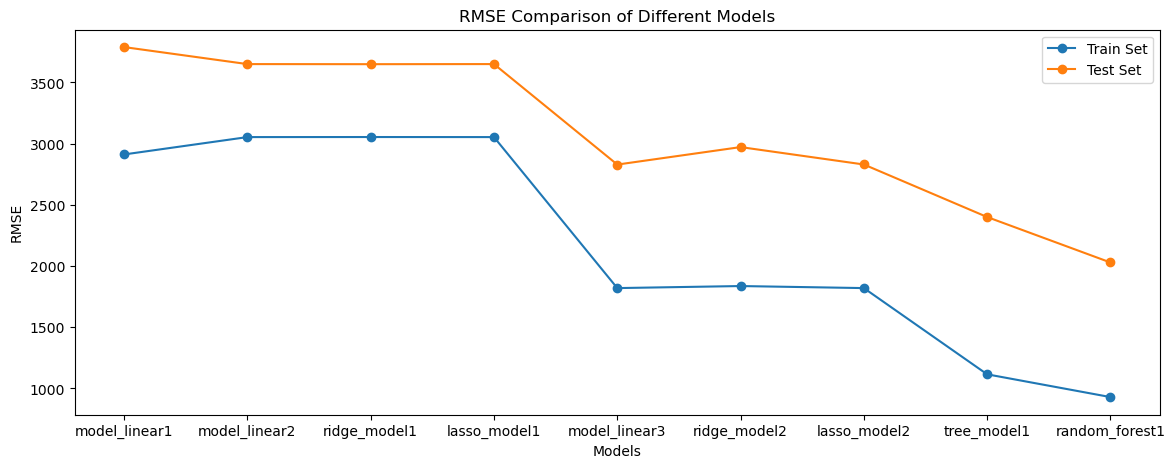

In [34]:
models = ['model_linear1', 'model_linear2', 'ridge_model1', 'lasso_model1', 'model_linear3', 'ridge_model2', 
         'lasso_model2', 'tree_model1', 'random_forest1']

train_rmse = [linear1_train_rmse, linear2_train_rmse, ridge1_train_rmse, lasso1_train_rmse, 
             linear3_train_rmse, ridge2_train_rmse, lasso2_train_rmse, tree1_train_rmse, forest1_train_rmse]

test_rmse = [linear1_test_rmse, linear2_test_rmse, ridge1_test_rmse, lasso1_test_rmse, 
             linear3_test_rmse, ridge2_test_rmse, lasso2_test_rmse, tree1_test_rmse, forest1_test_rmse]

plt.figure(figsize = (14,5))
plt.plot(models, train_rmse, label = "Train Set", marker = "o")
plt.plot(models, test_rmse, label = "Test Set", marker = "o")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title('RMSE Comparison of Different Models')
plt.legend()
plt.show()

##### R-Squared: the percentage that indicates the strength of the relationship between a model and the dependent variable(price)

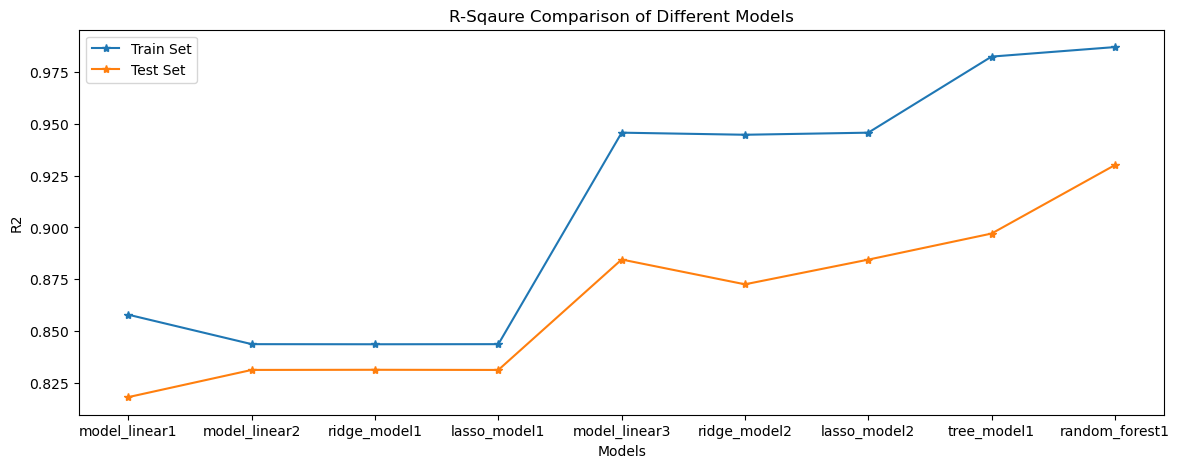

In [35]:
models = ['model_linear1', 'model_linear2', 'ridge_model1', 'lasso_model1', 'model_linear3', 'ridge_model2', 
         'lasso_model2', 'tree_model1', 'random_forest1']

train_r2 = [linear1_train_r2, linear2_train_r2, ridge1_train_r2, lasso1_train_r2, 
             linear3_train_r2, ridge2_train_r2, lasso2_train_r2, tree1_train_r2, forest1_train_r2]

test_r2 = [linear1_test_r2, linear2_test_r2, ridge1_test_r2, lasso1_test_r2, 
             linear3_test_r2, ridge2_test_r2, lasso2_test_r2, tree1_test_r2, forest1_test_r2]

plt.figure(figsize = (14, 5))
plt.plot(models, train_r2, marker = '*', label= "Train Set")
plt.plot(models, test_r2, marker = '*', label = "Test Set" )
plt.xlabel("Models")
plt.ylabel("R2")
plt.title('R-Sqaure Comparison of Different Models')
plt.legend()
plt.show()

## Obeservation:

#### - modeling with encoded and scaled categorical data had significantly improved the perdictive power of models

#### - ridge and lasso models does not improve the performace as exepcted